This has given us an Accuracy 99.75%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

2024-07-04 12:33:55.983912: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 12:33:55.986841: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 12:33:56.023484: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 12:33:56.759670: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# setting up the layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(102,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

/home/user/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Dataset**

In [5]:
ds = pd.read_csv('/home/user/Desktop/Lending Club/non_null_output.csv')

In [10]:
ds.shape

(614640, 103)

Separating Data and Label

In [6]:
X = ds.drop(columns = 'loan_status', axis = 1)
Y = ds['loan_status']

Test and Training Data Split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

Standardizing the Data

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Neural Network

In [9]:
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 771us/step - accuracy: 0.9778 - loss: 0.0615 - val_accuracy: 0.9951 - val_loss: 0.0153
Epoch 2/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 11s 774us/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9963 - val_loss: 0.0120
Epoch 3/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 10s 744us/step - accuracy: 0.9964 - loss: 0.0120 - val_accuracy: 0.9964 - val_loss: 0.0111
Epoch 4/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 10s 735us/step - accuracy: 0.9969 - loss: 0.0107 - val_accuracy: 0.9965 - val_loss: 0.0106
Epoch 5/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 10s 721us/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9970 - val_loss: 0.0104
Epoch 6/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 10s 752us/step - accuracy: 0.9974 - loss: 0.0088 - val_accuracy: 0.9974 - val_loss: 0.0095
Epoch 7/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 10s 734us/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9973 - val_loss: 0.0094
Epoch 8/10
13830/13830 ━━━━━━━━━━━━━━━━━━━━ 10s 739us/s

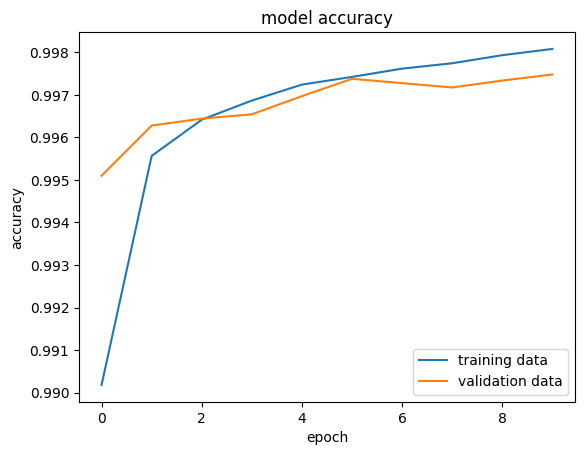

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

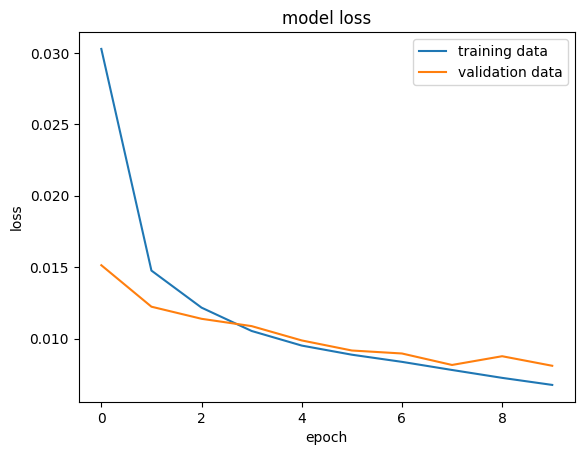

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [12]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

3842/3842 ━━━━━━━━━━━━━━━━━━━━ 2s 551us/step - accuracy: 0.9976 - loss: 0.0094
0.9975188970565796


In [13]:
print(X_test_std.shape)
print(X_test_std[0])

(122928, 102)
[ 7.23359349e-01 -1.56534034e+00 -1.56530161e+00 -1.56372988e+00
 -1.25436986e+00 -1.57869793e+00 -1.48414319e+00 -1.34405801e+00
 -3.31883691e-01 -1.04909813e+00 -3.39154906e-02 -1.34581028e+00
 -3.14541144e-02 -3.08126851e-01 -1.26143094e+00 -5.35096168e-01
 -3.64264303e-01  8.65838519e-01  8.65819015e-01  3.05959178e-01
 -6.72117780e-01 -3.05629971e-01 -3.58432058e-01 -4.73006461e-01
 -1.24668165e+00  2.07810100e+00  8.48191629e-01 -1.51640821e-01
 -1.51632354e-01 -1.18040152e+00 -1.17965000e+00 -1.01024823e+00
 -9.26848850e-01 -1.96228494e-01 -3.89166283e-01 -3.67469424e-01
 -4.55124455e-01  9.31722092e-01  6.53913803e-01 -1.20499243e-01
  0.00000000e+00 -1.62201612e-01 -6.50166635e-02 -1.21331212e-01
  2.85153425e+00  5.18278317e-01  8.76773642e-02  3.33190358e+00
  6.27059508e+00  1.10575907e-01  1.02069482e+00  9.51959950e-01
  5.30085636e-01 -8.32791136e-01 -8.21698055e-02  5.18667250e+00
 -3.46843720e-01  3.07349681e+00  4.63582796e+00  3.72322622e+00
  9.9502717

In [11]:
Y_pred = model.predict(X_test_std)

3842/3842 ━━━━━━━━━━━━━━━━━━━━ 2s 478us/step


In [12]:
print(Y_pred.shape)
print(Y_pred[0])

(122928, 2)
[0.05005802 0.9999385 ]


In [16]:
# converting the prediction probabilities to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [5]:
ds.columns.tolist()

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_las

In [17]:
row_as_list = X_test.iloc[49].tolist()
print(row_as_list)

[118273130.0, 5000.0, 5000.0, 5000.0, 12.62, 167.56, 2.0, 10.0, 191371.0, 4.0, 25000.0, 0.0, 0.0, 4.0, 45.0, 11.58, 2.0, 690.0, 694.0, 0.0, 12.0, 7.0, 0.0, 136.0, 0.8, 27.0, 1.0, 0.0, 0.0, 5741.2598391276, 5741.26, 5000.0, 726.26, 15.0, 0.0, 0.0, 3368.15, 704.0, 700.0, 0.0, 1.0, 0.0, 0.0, 0.0, 138303.0, 1.0, 1.0, 1.0, 3.0, 131.0, 1.0, 5.0, 0.0, 1.0, 17000.0, 3.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 130.0, 141.0, 2.0, 2.0, 0.0, 3.0, 1.0, 0.0, 3.0, 4.0, 3.0, 6.0, 4.0, 6.0, 10.0, 4.0, 9.0, 0.0, 0.0, 0.0, 1.0, 100.0, 0.0, 0.0, 0.0, 12500.0, 0.0, 0.0, 0.0, 11.0, 2017.0, 6.0, 1990.0, 3.0, 2019.0, 3.0, 2019.0, 36.0]


In [20]:
# to get weights
coef = model.get_weights()
coef

[array([[ 0.09533992,  0.70547575,  0.01413189, ...,  0.3050303 ,
         -0.28539476, -0.27967054],
        [-0.98902327, -0.60989785, -0.24053164, ...,  0.37988377,
         -0.4862285 , -0.5951726 ],
        [-0.9776473 , -0.5284472 , -0.2762905 , ...,  0.5515528 ,
         -1.0095397 , -0.965561  ],
        ...,
        [ 0.27487794,  0.36552584,  0.4178995 , ...,  0.2646803 ,
         -0.1090781 ,  0.07175921],
        [ 0.56795144,  0.5013297 , -0.48264447, ...,  0.03938618,
          0.23979315, -0.3121995 ],
        [-0.6951457 , -0.08279962, -0.665566  , ..., -0.16995774,
         -0.44356802, -0.06514949]], dtype=float32),
 array([-1.3087586 , -1.7872628 , -2.1355295 , -1.2755982 , -1.6940913 ,
        -1.5313945 , -1.4501916 ,  1.2757901 ,  1.5871632 ,  0.73594517,
         1.5951234 ,  1.5151179 , -1.9094027 , -0.5942551 , -1.4570664 ,
        -1.4450159 , -1.4239616 ,  0.8518818 , -1.2138871 , -1.3786831 ,
         1.2249736 ,  0.92272913,  1.1100348 , -1.5032965 , -1.599

In [13]:
input_data = [118273130.0, 5000.0, 5000.0, 5000.0, 12.62, 167.56, 2.0, 10.0, 191371.0, 4.0, 25000.0, 0.0, 0.0, 4.0, 45.0, 11.58, 2.0, 690.0, 694.0, 0.0, 12.0, 7.0, 0.0, 136.0, 0.8, 27.0, 1.0, 0.0, 0.0, 5741.2598391276, 5741.26, 5000.0, 726.26, 15.0, 0.0, 0.0, 3368.15, 704.0, 700.0, 0.0, 1.0, 0.0, 0.0, 0.0, 138303.0, 1.0, 1.0, 1.0, 3.0, 131.0, 1.0, 5.0, 0.0, 1.0, 17000.0, 3.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 130.0, 141.0, 2.0, 2.0, 0.0, 3.0, 1.0, 0.0, 3.0, 4.0, 3.0, 6.0, 4.0, 6.0, 10.0, 4.0, 9.0, 0.0, 0.0, 0.0, 1.0, 100.0, 0.0, 0.0, 0.0, 12500.0, 0.0, 0.0, 0.0, 11.0, 2017.0, 6.0, 1990.0, 3.0, 2019.0, 3.0, 2019.0, 36.0]

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

"""
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('Bad Loan: The loan should not be given')

else:
  print('Good Loan: The loan should be given')
"""

# to select the 2nd col in a row : print(prediction[0, 1])

if (prediction[0, 1] >= 0.75):
    print("very good loan")
elif (prediction[0, 1] >= 0.5):
    print("good loan")
elif (prediction[0, 0] >= 0.75):
    print("very bad loan")
elif (prediction[0, 0] >= 0.5):
    print("bad loan")
elif (prediction[0, 1] > [0,0]):
    print("good loan")
else:
    print("bad loan")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0.01524307 0.89523935]]
very good loan


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
